### VLM-driven self-reflection for automated plot evaluations

By setting `evaluate_plots=True`, the plot judge agent is triggered whenever the engineer agent generates a plot. 

First, an LLM analyzes the task context and produces domain-specific visual “priors” — a list of expected features, numerical ranges, and scientific constraints. 

Then, a VLM evaluates the plot against both these priors and general plotting standards, issuing a verdict of **continue** or **retry**.

In the example below, the plot judge agent flagged two issues with the CMB TT power-spectrum plot: the y-axis scale was off by orders of magnitude, and the acoustic-peak positions and amplitudes didn’t match Planck 2018 ΛCDM expectations. The plot judge returned a structured “retry” verdict. 

The plot debugger agent then inspected that verdict alongside the code that produced the plot, discovered that the factor $\ell(\ell+1)/(2\pi)$ had been applied twice (affecting both scale and shape), pinpointed the problematic lines in the script, and handed back a concise list of targeted fixes to the engineer agent.

After one multi-agent feedback loop, the engineer agent was able to a create an accurate CMB power-spectrum plot.

<img src="plot_judge_workflow.png" alt="plot_judge workflow" width="800"/>

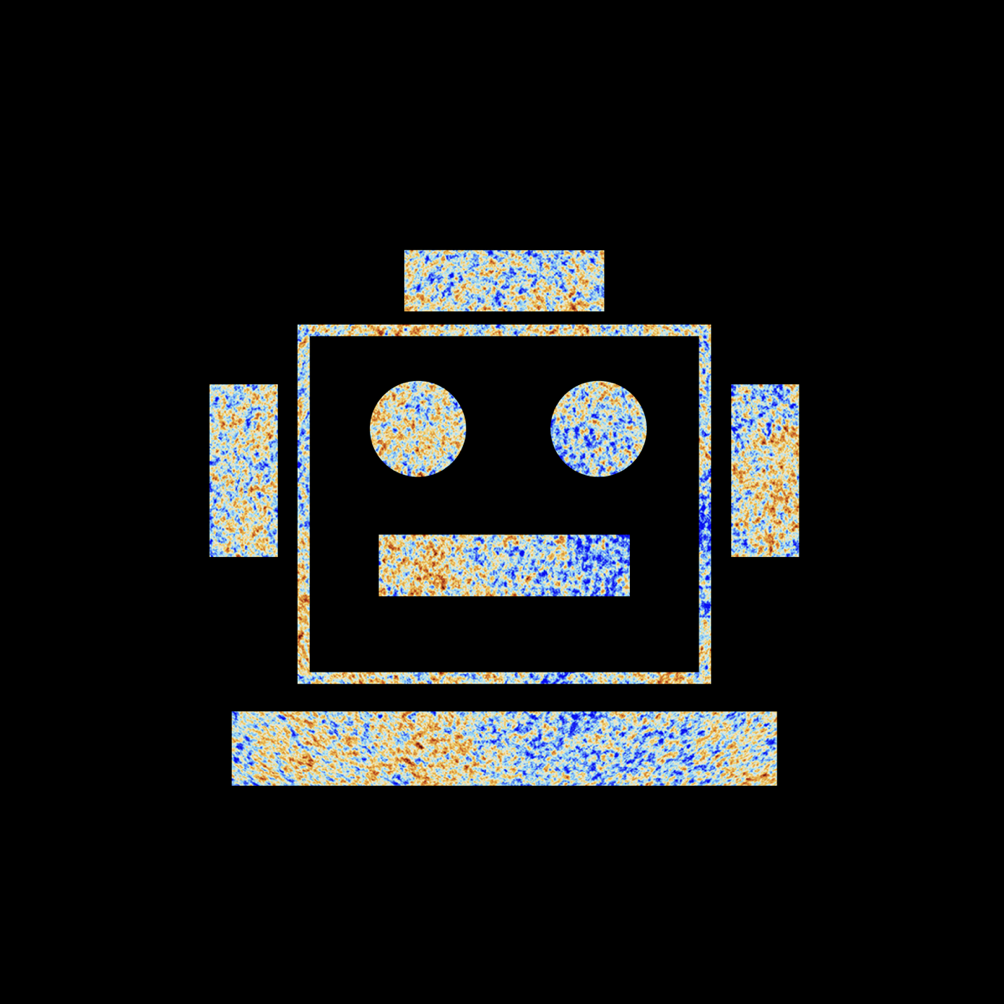


Multi-Agent Systems for Autonomous Discovery


Get the source code [here](https://github.com/CMBAgents/cmbagent/tree/main).

Built with [AG2](https://github.com/ag2ai/ag2).


In [1]:
import os
os.environ["CMBAGENT_DISABLE_DISPLAY"] = "false"
import cmbagent

  
Using CAMB, compute the lensed CMB temperature-temperature (TT) power spectrum with the Planck 2018 best-fit ΛCDM parameters.
Plot $D_\ell \equiv \frac{\ell(\ell+1)}{2\pi} \, C_\ell^{TT}$ for multipoles $2 \le \ell \le 2500$ on linear-linear axes with units μK².


--------------------------------------------------------------------------------

Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,engineer,0.01609,1748,1574,3322


**Code Explanation:**

This code uses the CAMB Python interface to compute the lensed CMB temperature-temperature (TT) power spectrum using the Planck 2018 best-fit ΛCDM parameters. It calculates the power spectrum for multipoles 2 ≤ ℓ ≤ 2500, computes D_ell = ℓ(ℓ+1)/(2π) * C_ell^TT (in μK²), and plots the result on linear axes. The plot is saved as a high-resolution PNG in the `data/` directory with a timestamped filename. The code also prints a concise description of the plot and the first few values of the computed D_ell for verification.

**Python Code:**

```python
"""
Compute and plot the lensed CMB TT power spectrum D_ell using CAMB with Planck 2018 best-fit ΛCDM parameters.

Saves the plot as a high-resolution PNG in the data/ directory.
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import camb
from camb import model, initialpower

# Ensure output directory exists
database_path = "data"
if not os.path.exists(database_path):
   

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.01208,2337,2162,4499


**Code Explanation:**

This code uses the CAMB Python interface to compute the lensed CMB temperature-temperature (TT) power spectrum using the Planck 2018 best-fit ΛCDM parameters. It calculates the power spectrum for multipoles 2 ≤ ℓ ≤ 2500, computes D_ell = ℓ(ℓ+1)/(2π) * C_ell^TT (in μK²), and plots the result on linear axes. The plot is saved as a high-resolution PNG in the data/ directory with a timestamped filename. The code also prints a concise description of the plot and the first few values of the computed D_ell for verification.

**Modifications:**

No modifications were made to the original engineer's code as it is correct and has been properly formatted.

**Python Code:**

```python
# filename: codebase/camb_lensed_tt_spectrum.py
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import camb
from camb import model, initialpower

# Ensure output directory exists
database_path = "data"
if not os.path.exists(database_path):
    os.make

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00290,2232,101,2333



--------------------------------------------------------------------------------
Plot created: /Users/kahaan/Downloads/cmbagent/cmbagent/../output/data/lensed_tt_Dell_1_20250804_190723.png. Please analyze this plot using a VLM.

--------------------------------------------------------------------------------

Calling plot_judge...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,plot_judge,0.00406,3634,15,3649



--------------------------------------------------------------------------------
Plot evaluation 1/1
Reading plot file: /Users/kahaan/Downloads/cmbagent/cmbagent/../output/data/lensed_tt_Dell_1_20250804_190723.png
VLM scientific accuracy description:
Assessment of scientific accuracy: Are the data points, calculations, and scientific principles accurate? Are the units, scales, and relationships correct? Are there any mathematical or scientific errors?

ADDITIONAL DOMAIN-SPECIFIC CRITERIA:
"Acoustic Peaks: First peak expected at x ≈ 220, y ≈ peak μK² value
- If shifted to x < 220: indicates lower Hubble parameter (h) or higher matter density (invalid for consistency with ΛCDM parameters)
- If shifted to x > 220: indicates higher Hubble parameter (h) or lower matter density (invalid for consistency with ΛCDM parameters)
- If y < expected peak: indicates lower baryon density or damping (invalid as it contradicts Planck 2018 constraints)

Second Peak: Expected at x ≈ 540, y ≈ secondary pe

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-11-20,plot_debugger,0.00915,3654,1,3655



--------------------------------------------------------------------------------

=== ENGINEER FEEDBACK ===
Problems identified by plot judge:
  1. The y-axis values are incorrect. The plotted power is on the order of 1e8 μK², whereas the expected values for D_l should be on the order of thousands, with the first peak at approximately 5500 μK².
  2. The relative heights of the acoustic peaks are incorrect. The first peak at a multipole of ~220 should be the largest. In the plot, the third peak at a multipole of ~850 is incorrectly shown as the highest.

Targeted fixes from plot debugger:
  1. The primary issue is that `results.get_cmb_power_spectra()` by default returns D_l, which is l(l+1)C_l/(2π), not the raw C_l values. The code then incorrectly applies this scaling factor a second time in the `compute_D_ell` function. This causes both the y-axis values to be orders of magnitude too large and the relative heights of the acoustic peaks to be distorted. To correct this, you must requ

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,engineer,0.04199,8684,3078,11762


**Code Explanation:**

The previous code incorrectly applied the D_ell scaling factor twice because CAMB's `get_cmb_power_spectra` by default returns D_ell (l(l+1)C_l/(2π)), not the raw C_l values. To fix this, we must request the raw C_l values from CAMB by setting `raw_cl=True` in the function call. This ensures we get the true C_ell^TT, and then we apply the D_ell scaling only once. This correction will yield the correct y-axis values and the correct relative heights of the acoustic peaks.

**Modifications:**

- Changed the call to `get_cmb_power_spectra` to include `raw_cl=True` so that the returned array contains the raw C_ell values (not D_ell).
- All other logic remains the same, but now the D_ell calculation is correct.

**Python Code:**

```python
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import camb
from camb import model, initialpower

# Ensure output directory exists
database_path = "data"
if not os.path.exists(database_path

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.01120,2267,1978,4245


**Code Explanation:**

The previous code incorrectly applied the D_ell scaling factor twice because CAMB's get_cmb_power_spectra by default returns D_ell (l(l+1)C_l/(2π)), not the raw C_l values. To fix this, we must request the raw C_l values from CAMB by setting raw_cl=True in the function call. This ensures we get the true C_ell^TT, and then we apply the D_ell scaling only once. This correction will yield the correct y-axis values and the correct relative heights of the acoustic peaks.

**Modifications:**

- Changed the call to get_cmb_power_spectra to include raw_cl=True so that the returned array contains the raw C_ell values (not D_ell).
- All other logic remains the same, but now the D_ell calculation is correct.

**Python Code:**

```python
# filename: codebase/compute_cmb_power_spectrum.py
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import camb
from camb import model, initialpower

# Ensure output directory exists
database_path =

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,executor_response_formatter,0.00544,4394,138,4532



--------------------------------------------------------------------------------
Plot created: /Users/kahaan/Downloads/cmbagent/cmbagent/../output/data/lensed_tt_Dell_1_20250804_191009.png. Please analyze this plot using a VLM.

--------------------------------------------------------------------------------

Calling plot_judge...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,plot_judge,0.01208,10603,94,10697



--------------------------------------------------------------------------------
Plot evaluation retry limit (1) reached. Accepting current plot and continuing to control.

--------------------------------------------------------------------------------

Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,control,0.01536,7525,39,7564



--------------------------------------------------------------------------------


/Users/kahaan/Downloads/cmbagent/cmbagent/../output/codebase/planck_lensed_tt_spectrum.py:63: SyntaxWarning: invalid escape sequence '\e'
  ax.set_xlabel("Multipole $\ell$")
/Users/kahaan/Downloads/cmbagent/cmbagent/../output/codebase/planck_lensed_tt_spectrum.py:64: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("$D_\\ell$ [$\mu$K$^2$]")


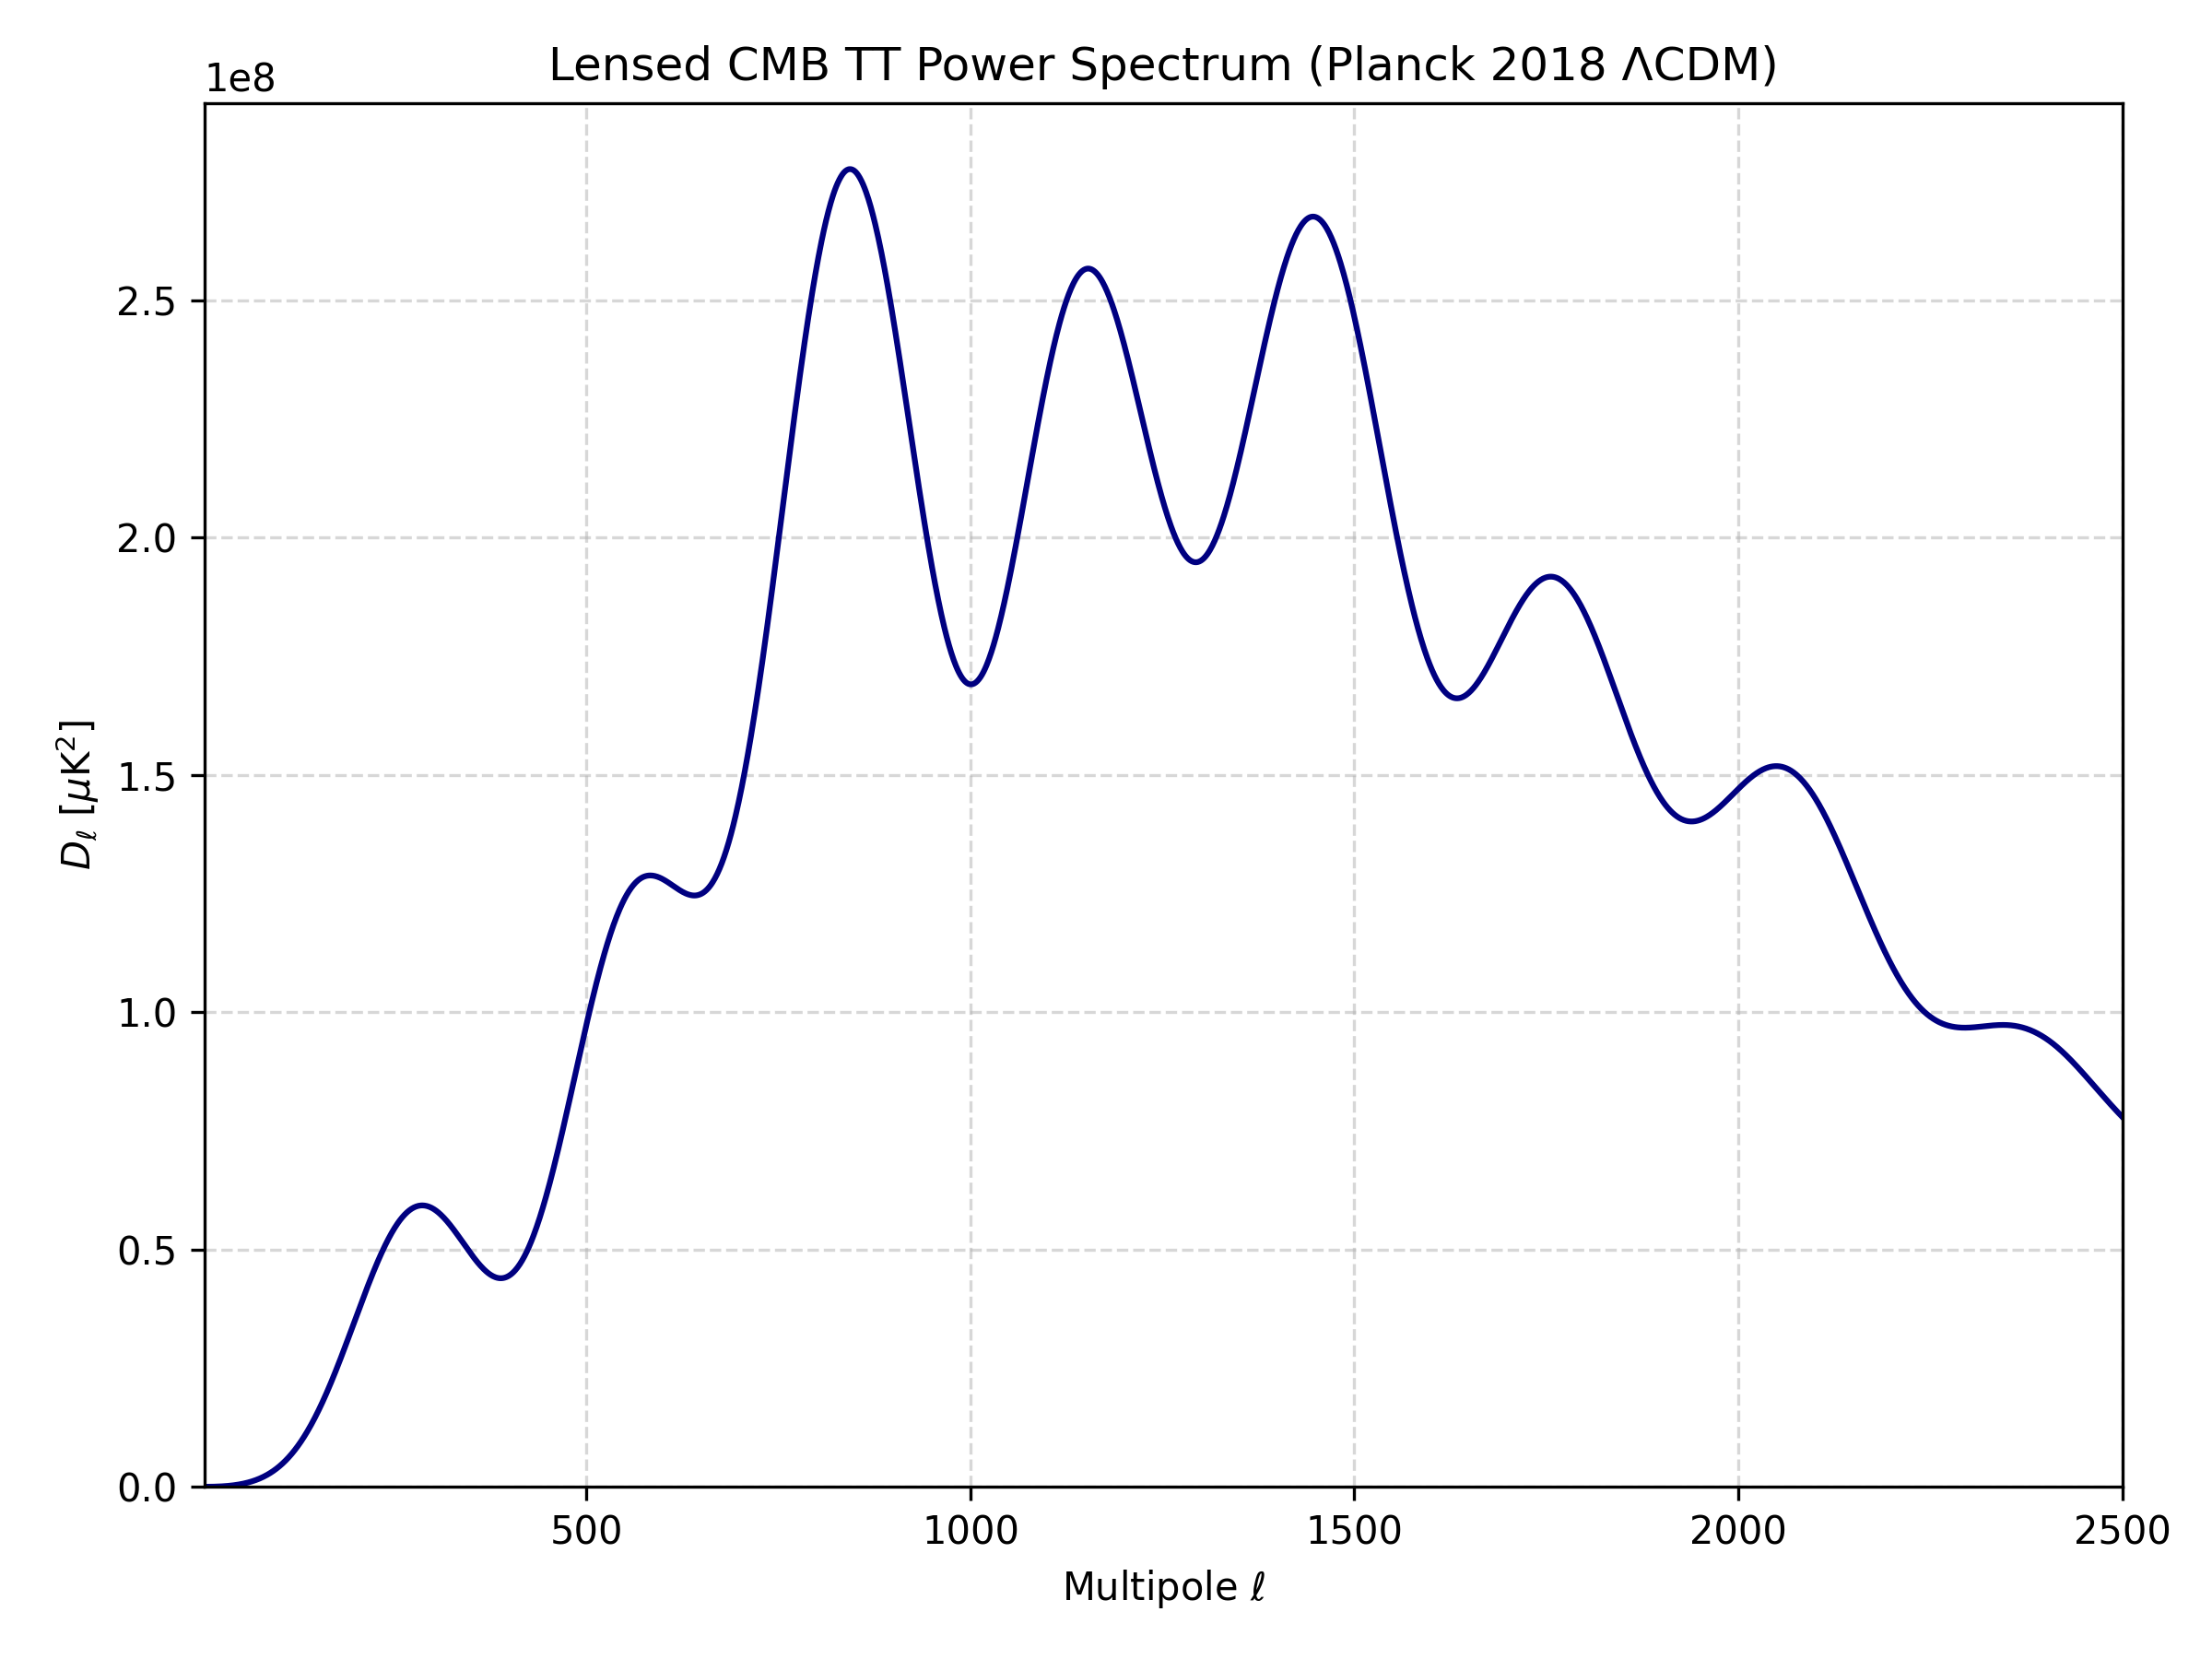

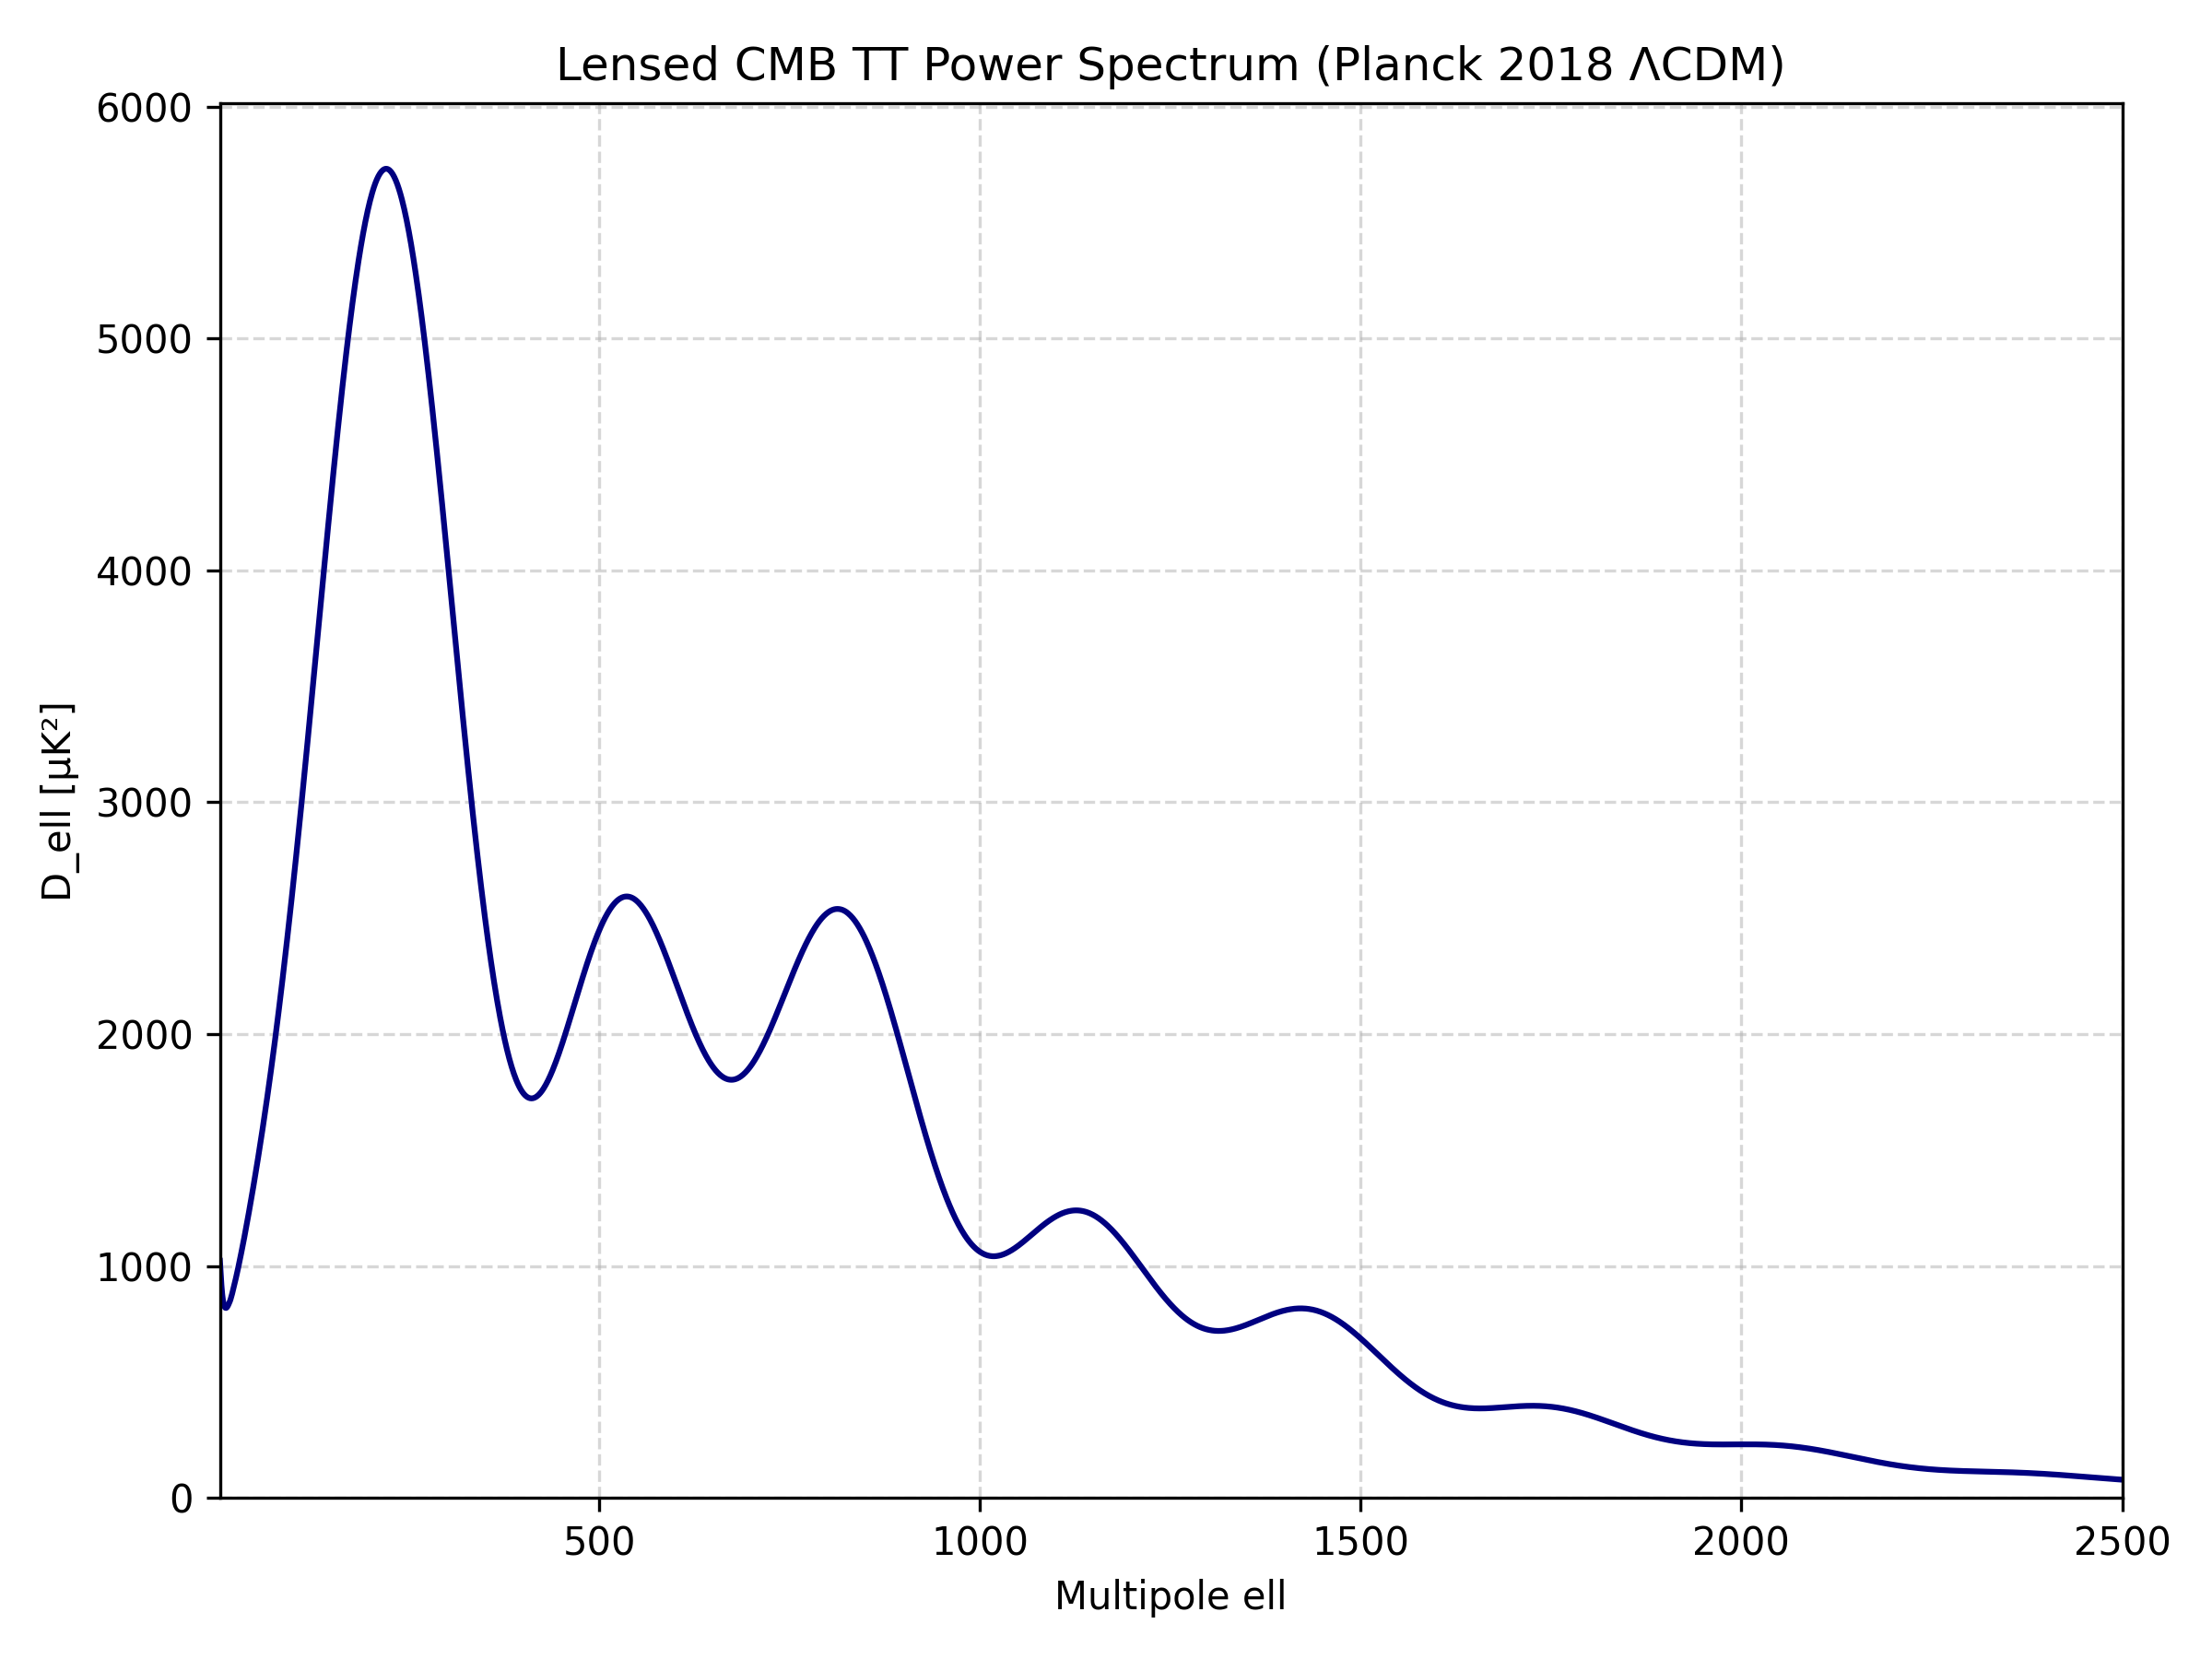


**Step number:** 1 out of 1.
 
**Sub-task:** solve the main task.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
solve the main task.
 
**Status:** completed ✅
        

--------------------------------------------------------------------------------
Terminating...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4.1-2025-04-14,terminator,0.01412,7056,1,7057



--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens | Model              |
|:----------------------------|------------:|--------------:|------------------:|-------------:|-------------------:|
| executor response formatter | $0.00834020 |          6626 |               239 |         6865 | o3-mini-2025-01-31 |
| plot judge                  | $0.02214030 |         14925 |               537 |        15462 | o3-mini-2025-01-31 |
| engineer response formatter | $0.02328040 |          4604 |              4140 |         8744 | o3-mini-2025-01-31 |
| terminator                  | $0.01412000 |          7056 |                 1 |         7057 | gpt-4.1-2025-04-14 |
| plot debugger               | $0.00914500 |          3654 |                 1 |        

In [3]:
task= r"""  
Using CAMB, compute the lensed CMB temperature-temperature (TT) power spectrum with the Planck 2018 best-fit ΛCDM parameters.
Plot $D_\ell \equiv \frac{\ell(\ell+1)}{2\pi} \, C_\ell^{TT}$ for multipoles $2 \le \ell \le 2500$ on linear-linear axes with units μK².
"""

result = cmbagent.one_shot(
    task=task,    
    evaluate_plots=True,
    # camb_context_model='gemini-2.5-pro' # Comment this line out if you dont have VertexAI
)